## **Description**
Kowalski, Analysis is image recognition software that utilizes a Convolutional Neural Network (CNN) in order to recognize the several different species of birds. The current species list is as follows:



1. Bluejay
2. Cardinal
3. Crow
4. Dove
5. Eagle
6. Falcon
7. Flamingo
8. Hummingbird
9. Magpie
10. Ostrich
11. Owl
12. Parrot
13. Robin
14. Turkey
15. Woodpecker

Our dataset consists of 50 images for each species of bird, which gives us 750 imags in total. This data is split 80/20 for training and testing respectively. As we progress, we intent to expand the current dataset to include more images for each species as well as include more species to introduce to our CNN model. The link to the most-recent dataset can be found [here](https://drive.google.com/drive/folders/1OxYnYbY4vN93Gr4MML7XiqN2HXtBghw3?usp=sharing)

The model makes use of the TensorFlow library. We chose this library for its ability to streamline the process of creating and optimizing a convolutional neural network as well as its ability to easily inegrate with web and mobile applications via the Google Firebase API. We are currently finding ways to improve the real-world accuracy of our model while simultaneously creating a frontend mobile application for Android in order for other users to try out the model for themselves.




## How it works
- Split up data into training and testing with a split of roughly 80% training and 20% testing
- Utilize tensorflow to create Convolutional Neural Network
- Optimize the network using keras
- Train the model
- Export the model


Authors: Ansh Sawant, Cameron Nixon, Jonathan Helms, Roy Ulrichiii, Sarah Shealy, Tyler Johnson

## Loading Google Drive Stuff

In [1]:
import os
from google.colab import drive
drive.mount("/content/drive")

working_dir = '/content/drive/My Drive/birb_data_set'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

## Getting Data

In [3]:
data_dir = pathlib.Path(working_dir)
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

750


## Loading Data Using Keras and Tuning Parameters

In [4]:
#Parameter Tuning
batch_size = 64           #16-64 seems best
epochs = 64               #32-64 seems best
learning_rate = 0.001     #0.0001 - 0.001 seems best
patience_limit = 64       #set less than batch size for early stopping
validation_split = 0.2    #percent for validation data. 0.2 seems best

img_height = 128          #128 or higher seems best
img_width = 128           #128 or higher seems best

conv_size_1 = 64          #original is 16
drop_size_1 = 0.2         #0.2-0.5 seems best
conv_size_2 = 32          #original is 32
drop_size_2 = 0.2         #0.2-0.5 seems best
conv_size_3 = 16          #original is 64
drop_size_3 = 0.2         #0.2-0.5 seems best
output_size = 128         #original is 128

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=validation_split,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=validation_split,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 750 files belonging to 15 classes.
Using 600 files for training.
Found 750 files belonging to 15 classes.
Using 150 files for validation.


In [6]:
print(train_ds.class_names)

['bluejay', 'cardinal', 'crow', 'dove', 'eagle', 'falcon', 'flamingo', 'hummingbird', 'magpie', 'ostrich', 'owl', 'parrot', 'robin', 'turkey', 'woodpecker']


##Configure Dataset to Perform

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

##Creating The Model

In [8]:
num_classes = 15

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(conv_size_1, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(drop_size_1),
  layers.Conv2D(conv_size_2, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(drop_size_2),
  layers.Conv2D(conv_size_3, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(drop_size_3),
  layers.Flatten(),
  layers.Dense(output_size, activation='relu'),
  layers.Dense(num_classes, activation='relu')
])


es_callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20)

In [9]:
model.compile(optimizer=Adam(lr=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 128, 128, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)       

##Training The Model

In [11]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[es_callback]
)

Epoch 1/64
10/10 [==============================] - 97s 4s/step - loss: 2.7287 - accuracy: 0.0580 - val_loss: 2.7088 - val_accuracy: 0.0467
Epoch 2/64
10/10 [==============================] - 20s 2s/step - loss: 2.7034 - accuracy: 0.0789 - val_loss: 2.6946 - val_accuracy: 0.1600
Epoch 3/64
10/10 [==============================] - 20s 2s/step - loss: 2.6777 - accuracy: 0.1156 - val_loss: 2.6301 - val_accuracy: 0.1867
Epoch 4/64
10/10 [==============================] - 20s 2s/step - loss: 2.5754 - accuracy: 0.2135 - val_loss: 2.4883 - val_accuracy: 0.2467
Epoch 5/64
10/10 [==============================] - 20s 2s/step - loss: 2.4947 - accuracy: 0.2438 - val_loss: 2.4708 - val_accuracy: 0.2467
Epoch 6/64
10/10 [==============================] - 20s 2s/step - loss: 2.4264 - accuracy: 0.2742 - val_loss: 2.4411 - val_accuracy: 0.2400
Epoch 7/64
10/10 [==============================] - 20s 2s/step - loss: 2.3837 - accuracy: 0.2915 - val_loss: 2.4056 - val_accuracy: 0.2667
Epoch 8/64
10/10 [==


##Result Visualization

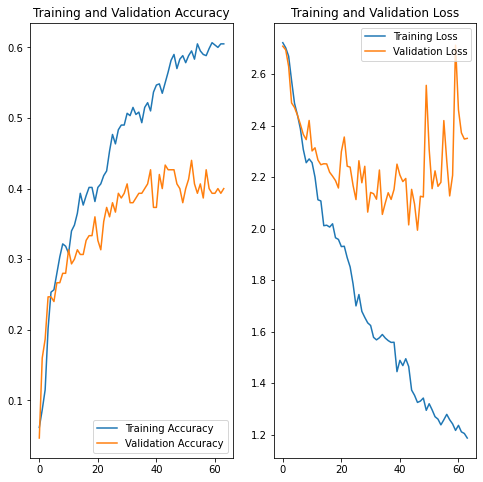

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##Model Export To Keras and TFLite

In [13]:
def average(some_list):
  return round(sum(some_list)/len(some_list), 4)

def median(some_list):
  return round(some_list[int(len(some_list)/2)], 4)

def parameters_to_string():
  return '\'' + str(batch_size) + ','+ str(epochs) + ','+ str(learning_rate) + ','+ str(img_height) + ','+ str(img_width) + '\''

#Save keras model
file_string = '/content/drive/My Drive/birb_data_nn_models/orig-keras/keras_model-avg-' + str(average(val_acc)) + 'median' + str(median(val_acc)) + '-max-' + str(round(max(val_acc), 4)) + '-param-' + parameters_to_string() + '.tflite'
model.save(file_string)

#Convert model to tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save tflite model.
file_string = '/content/drive/My Drive/birb_data_nn_models/tflite/tflite_model-avg-' + str(average(val_acc)) + 'median' + str(median(val_acc)) + '-max-' + str(round(max(val_acc), 4)) + '-param-' + parameters_to_string() + '.tflite'
with open(file_string, 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /content/drive/My Drive/birb_data_nn_models/orig-keras/keras_model-avg-0.3554median0.38-max-0.44-param-'64,64,0.001,128,128'.tflite/assets
INFO:tensorflow:Assets written to: /tmp/tmpa_ldbj40/assets


# **Kowalski, Analysis**
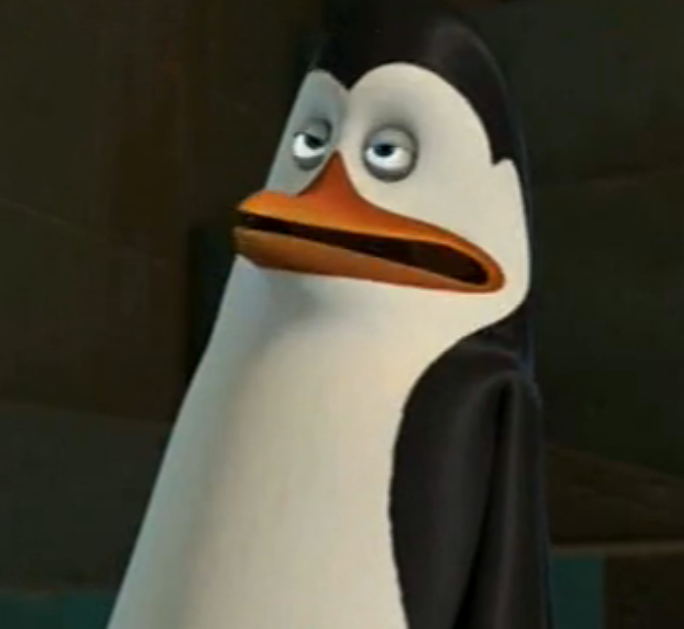
<center>
